## IMPORTAR LIBRERIAS NECESARIAS

In [1]:
import pandas as pd
%pip install nltk
%pip install langdetect
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from langdetect import detect
%pip install googletrans==3.1.0a0
from nltk.corpus import stopwords
import re
from collections import Counter
from googletrans import Translator
translator = Translator(service_urls=['translate.googleapis.com'])
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package punkt to /home/zuzu9627/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/zuzu9627/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zuzu9627/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/zuzu9627/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/zuzu9627/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,train_idx,title,description,target,creator_name,creator_location,supporters,created_date,banner_image,full_content,victory_flag
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],UN Watch,"Geneva, Switzerland",80515,10 May 2023,https://assets.change.org/photos/2/ur/wj/vrUrW...,No Joke: The Islamic Republic of Iran has just...,0
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],Maialen Alawam,"Watertown, MA, United States",23871,25 Jun 2020,https:https://static.change.org/images/default...,Children in Syria are facing extreme poverty. ...,0
2,2,Save Duke Ellington School Of The Arts,NaN,NaN,It’s Me Tivoni,United States,4051,"Nov. 20, 2022",https://assets.change.org/photos/8/ab/hv/DZaBH...,Save Duke Ellington School Of The ArtsTivoni H...,0
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",Swastik Raj Chauhan,"Ghaziabad, India",350,"Oct 15, 2017",https://assets.change.org/photos/7/by/in/Kzbyi...,"In India, after Reliance Jio (a 4G only mobile...",0
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],Tiffany Miller @tiffbmiller,"Walnut Creek, CA, United States",176092,2 Dec 2015,https://assets.change.org/photos/3/lh/jc/TmLhJ...,"During World War II, a brave group of women jo...",1


In [4]:
#Comprobación existencia valores nulos
df.isna().sum()
# Limpiar valores nulos:
df_purged=df.dropna()
df_purged.isna().sum()

train_idx           0
title               0
description         0
target              0
creator_name        0
creator_location    0
supporters          0
created_date        0
banner_image        0
full_content        0
victory_flag        0
dtype: int64

In [5]:
# Comprobamos  y borramos si existen valores duplicados
df_purged.duplicated().sum()



0

In [6]:
#  Crear una copia explícita del DataFrame
df_purged = df_purged.copy()

In [7]:
# Eliminar data no relevante 
    #  Columna con la url de los banners
df_purged.drop('banner_image', axis=1, inplace=True)
    #  Columna nombre del creador
df_purged.drop('creator_name', axis=1, inplace=True)
    #  Columna fecha de creacion
df_purged.drop('created_date', axis=1, inplace=True) 
df_purged


,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],"Geneva, Switzerland",80515,No Joke: The Islamic Republic of Iran has just...,0
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],"Watertown, MA, United States",23871,Children in Syria are facing extreme poverty. ...,0
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...","Ghaziabad, India",350,"In India, after Reliance Jio (a 4G only mobile...",0
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],"Walnut Creek, CA, United States",176092,"During World War II, a brave group of women jo...",1
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']","Ottawa, Canada",36053,Ontario Premier Doug Ford is following up on h...,0
...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...","New Mexico, United States",4036,We have less than 7 years until the effects of...,0
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']","Salisbury, ENG, United Kingdom",6393,"If your dream was to live in another country, ...",0
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],"Lynchburg, VA, United States",71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1


## DETECCION IDIOMA DE PETICIONES

In [8]:

def detect_language(text):
    # Tokenización de palabras
    tokens = word_tokenize(text.lower())

    # Lematización de palabras
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Detección del idioma
    language = detect(' '.join(tokens))
    return language


In [9]:
# Creamos una columna donde guardamos el idioma de la peticion
df_purged['language'] = df_purged['title'].apply(detect_language)
df_purged

,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],"Geneva, Switzerland",80515,No Joke: The Islamic Republic of Iran has just...,0,en
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],"Watertown, MA, United States",23871,Children in Syria are facing extreme poverty. ...,0,en
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...","Ghaziabad, India",350,"In India, after Reliance Jio (a 4G only mobile...",0,en
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],"Walnut Creek, CA, United States",176092,"During World War II, a brave group of women jo...",1,en
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']","Ottawa, Canada",36053,Ontario Premier Doug Ford is following up on h...,0,en
...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...","New Mexico, United States",4036,We have less than 7 years until the effects of...,0,en
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']","Salisbury, ENG, United Kingdom",6393,"If your dream was to live in another country, ...",0,en
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],"Lynchburg, VA, United States",71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en


In [10]:
# Lista de idiomas de las peticiones
df_purged['language'].unique()

array(['en', 'lt', 'es', 'fr', 'it', 'pt', 'ja', 'nl', 'fi', 'no', 'ca',
       'tl', 'af', 'id', 'ru', 'da', 'ro', 'de', 'hr', 'et', 'bg', 'pl',
       'sk', 'cy', 'th', 'tr', 'ar', 'sl', 'sv'], dtype=object)

In [11]:
# Numerar los 5 idiomas con mayores peticiones
df_purged['language'].value_counts().head()

en    1372
fr     142
it      85
es      34
ru      27
Name: language, dtype: int64

In [12]:
# Obtener los 5 idiomas más usados
top_languages = df_purged['language'].value_counts().head(5).index.tolist()

# Filtrar el DataFrame para incluir solo las peticiones en los 5 idiomas más utilizados
df_filtered = df_purged[df_purged['language'].isin(top_languages)]

# Imprimir el DataFrame filtrado
(df_filtered)


,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],"Geneva, Switzerland",80515,No Joke: The Islamic Republic of Iran has just...,0,en
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],"Watertown, MA, United States",23871,Children in Syria are facing extreme poverty. ...,0,en
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...","Ghaziabad, India",350,"In India, after Reliance Jio (a 4G only mobile...",0,en
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],"Walnut Creek, CA, United States",176092,"During World War II, a brave group of women jo...",1,en
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']","Ottawa, Canada",36053,Ontario Premier Doug Ford is following up on h...,0,en
...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...","New Mexico, United States",4036,We have less than 7 years until the effects of...,0,en
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']","Salisbury, ENG, United Kingdom",6393,"If your dream was to live in another country, ...",0,en
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],"Lynchburg, VA, United States",71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en


## COMPROBACIÓN CONSISTENCIA DATOS

In [13]:

# Extraer solo el país de la columna 'creator_location'
df_filtered['creator_location'] = df_filtered['creator_location'].str.split(',').str[-1].str.strip()
df_filtered['creator_location'].value_counts()
df_filtered

/tmp/ipykernel_34096/1994244992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['creator_location'] = df_filtered['creator_location'].str.split(',').str[-1].str.strip()


,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],Switzerland,80515,No Joke: The Islamic Republic of Iran has just...,0,en
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],United States,23871,Children in Syria are facing extreme poverty. ...,0,en
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",India,350,"In India, after Reliance Jio (a 4G only mobile...",0,en
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],United States,176092,"During World War II, a brave group of women jo...",1,en
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']",Canada,36053,Ontario Premier Doug Ford is following up on h...,0,en
...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...",United States,4036,We have less than 7 years until the effects of...,0,en
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']",United Kingdom,6393,"If your dream was to live in another country, ...",0,en
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],United States,71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en


## TRADUCIR AL INGLÉS LAS PETICIONES

In [15]:

# Definir una función para traducir una columna
def translate_column(column):
    translated_column = []
    for text in column:
        translation = translator.translate(text,dest='en').text
        translated_column.append(translation)
    return translated_column
# 
# Traducir la columna 'title' y almacenar los resultados en una nueva columna
df_filtered["title_translated"] = translate_column(df_filtered["title"])

# Traducir la columna 'description' y almacenar los resultados en una nueva columna
df_filtered["description_translated"] = translate_column(df_filtered["description"])

# Traducir la columna 'full_content' y almacenar los resultados en una nueva columna
df_filtered["full_content_translated"] = translate_column(df_filtered["full_content"])

# Mostrar el dataframe resultante
df_filtered


/tmp/ipykernel_34096/1516059828.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["title_translated"] = translate_column(df_filtered["title"])
/tmp/ipykernel_34096/1516059828.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["description_translated"] = translate_column(df_filtered["description"])
/tmp/ipykernel_34096/1516059828.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language,title_translated,description_translated,full_content_translated
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],Switzerland,80515,No Joke: The Islamic Republic of Iran has just...,0,en,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,No Joke: The Islamic Republic of Iran has just...
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],United States,23871,Children in Syria are facing extreme poverty. ...,0,en,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,Children in Syria are facing extreme poverty. ...
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",India,350,"In India, after Reliance Jio (a 4G only mobile...",0,en,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","In India, after Reliance Jio (a 4G only mobile..."
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],United States,176092,"During World War II, a brave group of women jo...",1,en,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...","During World War II, a brave group of women jo..."
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']",Canada,36053,Ontario Premier Doug Ford is following up on h...,0,en,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,Ontario Premier Doug Ford is following up on h...
...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr,Justice pour Fortune,A Togolese student murdered in France,A Togolese student murdered in France
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...",United States,4036,We have less than 7 years until the effects of...,0,en,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...",We have less than 7 years until the effects of...
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']",United Kingdom,6393,"If your dream was to live in another country, ...",0,en,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"If your dream was to live in another country, ..."
1963,1963,Approve my Social Security Disability,disability have been denied even though my med...,['Richard Burr'],United States,71938,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...,1,en,Approve my Social Security Disability,disability have been denied even though my med...,I WANT TO PERSONALLY THANK EVERY ONE OF YOU FO...


## ELIMINAR PALABRAS IRRELEVANTES (STOPWORDS)

In [16]:

# Descargar los stopwords si aún no están descargados
nltk.download('stopwords')

# Obtener los stopwords en el idioma deseado (en este caso, inglés)
stop_words = set(stopwords.words('english'))

# Definir una función para eliminar las palabras irrelevantes de un texto
def remove_stopwords(text):
    tokens = word_tokenize(text.upper())
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Aplicar la función remove_stopwords a la columna 'title_translated' del dataframe df_filtered
df_filtered['title_cleaned_nostopwords'] = df_filtered['title_translated'].apply(remove_stopwords)
df_filtered['description_nostopwords'] = df_filtered['description_translated'].apply(remove_stopwords)
df_filtered['full_content_nostopwords'] = df_filtered['full_content_translated'].apply(remove_stopwords)


# Mostrar el dataframe resultante
df_filtered


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/zuzu9627/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_34096/3044821967.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['title_cleaned_nostopwords'] = df_filtered['title_translated'].apply(remove_stopwords)
/tmp/ipykernel_34096/3044821967.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['description_nostopwords'] = df_filtered['description_translated'].apply(remove_stopwor

,train_idx,title,description,target,creator_location,supporters,full_content,victory_flag,language,title_translated,description_translated,full_content_translated,title_cleaned_nostopwords,description_nostopwords,full_content_nostopwords
0,0,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,['António Guterres'],Switzerland,80515,No Joke: The Islamic Republic of Iran has just...,0,en,Stop Iran Regime from Chairing U​.​N. Human Ri...,Rights Council 2023 Social Forum. This year's ...,No Joke: The Islamic Republic of Iran has just...,STOP IRAN REGIME CHAIRING U​.​N . HUMAN RIGHTS...,RIGHTS COUNCIL 2023 SOCIAL FORUM . YEAR 'S THE...,JOKE : ISLAMIC REPUBLIC IRAN APPOINTED CHAIR U...
1,1,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,['UNICEF'],United States,23871,Children in Syria are facing extreme poverty. ...,0,en,Save Children In Poverty In Syria,Children in Syria are facing extreme poverty. ...,Children in Syria are facing extreme poverty. ...,SAVE CHILDREN POVERTY SYRIA,CHILDREN SYRIA FACING EXTREME POVERTY . OFTENT...,CHILDREN SYRIA FACING EXTREME POVERTY . OFTENT...
3,3,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","['Telecom Regulatory Authority of India', 'CEL...",India,350,"In India, after Reliance Jio (a 4G only mobile...",0,en,Mobile operators are creating inequality,"In India, after Reliance Jio (a 4G only mobile...","In India, after Reliance Jio (a 4G only mobile...",MOBILE OPERATORS CREATING INEQUALITY,"INDIA , RELIANCE JIO ( 4G MOBILE OPERATOR ) , ...","INDIA , RELIANCE JIO ( 4G MOBILE OPERATOR ) , ..."
4,4,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...",['U.S. Senate'],United States,176092,"During World War II, a brave group of women jo...",1,en,Grant Military Burial Honors to Women WWII Pilots,"During World War II, a brave group of women jo...","During World War II, a brave group of women jo...",GRANT MILITARY BURIAL HONORS WOMEN WWII PILOTS,"WORLD WAR II , BRAVE GROUP WOMEN JOINED WAR EF...","WORLD WAR II , BRAVE GROUP WOMEN JOINED WAR EF..."
5,5,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,"['Doug Ford', 'Doug Downey', 'Premier Doug Ford']",Canada,36053,Ontario Premier Doug Ford is following up on h...,0,en,Don't Violate the Charter of Rights,rulings that find he or his government have vi...,Ontario Premier Doug Ford is following up on h...,N'T VIOLATE CHARTER RIGHTS,RULINGS FIND GOVERNMENT VIOLATED FUNDAMENTAL R...,ONTARIO PREMIER DOUG FORD FOLLOWING AUGUST 201...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,1960,Justice pour Fortune,Une étudiante togolaise assassinée en France,['Pétition adressée à au Gouvernement Togolais...,Ghana,15341,Une étudiante togolaise assassinée en France,1,fr,Justice pour Fortune,A Togolese student murdered in France,A Togolese student murdered in France,JUSTICE POUR FORTUNE,TOGOLESE STUDENT MURDERED FRANCE,TOGOLESE STUDENT MURDERED FRANCE
1961,1961,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...","['The World', 'Joseph R. Biden', 'Boris Johnso...",United States,4036,We have less than 7 years until the effects of...,0,en,100% Clean Renewable Energy by 2030.,"switch to 100% clean renewable energy by 2030,...",We have less than 7 years until the effects of...,100 % CLEAN RENEWABLE ENERGY 2030 .,"SWITCH 100 % CLEAN RENEWABLE ENERGY 2030 , CON...",LESS 7 YEARS EFFECTS CLIMATE CHANGE IRREVERSIB...
1962,1962,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"['Sajid Javid', 'Caroline Nokes', 'Diane Abbott']",United Kingdom,6393,"If your dream was to live in another country, ...",0,en,Create a Fair and Compassionate UK Immigration...,treated?\nThis petition challenges the U.K. go...,"If your dream was to live in another country, ...",CREATE FAIR COMPASS

### CONTAR LAS PALABRAS MÁS UTILIZADAS

In [17]:

# Unir todas las palabras en una lista y eliminar los signos de puntuación
all_words = ' '.join(df_filtered['title_cleaned_nostopwords'])
all_words += ' '.join(df_filtered['description_nostopwords'])
all_words += ' '.join(df_filtered['full_content_nostopwords'])
all_words = re.findall(r'\b\w{2,}\b', all_words)

# Contar la frecuencia de cada palabra
word_counts = Counter(all_words)

# Obtener las palabras más repetidas y mostrarlas en orden descendente
most_common_words = word_counts.most_common(20)

# Mostrar las palabras más usadas
print('Palabras más repetidas:')
for word, count in most_common_words:
    print(f'{word}: {count}')



Palabras más repetidas:
DE: 2633
PEOPLE: 2451
HEALTH: 2197
PETITION: 1641
US: 1585
MANY: 1524
WOMEN: 1474
GOVERNMENT: 1441
WOULD: 1424
LA: 1384
HELP: 1340
ONE: 1336
CARE: 1326
PUBLIC: 1319
SUPPORT: 1318
TIME: 1306
NEED: 1305
MENTAL: 1298
ALSO: 1233
POLICE: 1162


# EXPORTAR BBDD CLEANED

In [18]:
# Crear una nueva DataFrame con las columnas específicas
df_clean_train = df_filtered[['title_cleaned_nostopwords', 'description_nostopwords', 'full_content_nostopwords', 'victory_flag', 'supporters']].copy()
df_clean_train.to_csv('dataframe_train.csv', index=False)
df_clean_train

,title_cleaned_nostopwords,description_nostopwords,full_content_nostopwords,victory_flag,supporters
0,STOP IRAN REGIME CHAIRING U​.​N . HUMAN RIGHTS...,RIGHTS COUNCIL 2023 SOCIAL FORUM . YEAR 'S THE...,JOKE : ISLAMIC REPUBLIC IRAN APPOINTED CHAIR U...,0,80515
1,SAVE CHILDREN POVERTY SYRIA,CHILDREN SYRIA FACING EXTREME POVERTY . OFTENT...,CHILDREN SYRIA FACING EXTREME POVERTY . OFTENT...,0,23871
3,MOBILE OPERATORS CREATING INEQUALITY,"INDIA , RELIANCE JIO ( 4G MOBILE OPERATOR ) , ...","INDIA , RELIANCE JIO ( 4G MOBILE OPERATOR ) , ...",0,350
4,GRANT MILITARY BURIAL HONORS WOMEN WWII PILOTS,"WORLD WAR II , BRAVE GROUP WOMEN JOINED WAR EF...","WORLD WAR II , BRAVE GROUP WOMEN JOINED WAR EF...",1,176092
5,N'T VIOLATE CHARTER RIGHTS,RULINGS FIND GOVERNMENT VIOLATED FUNDAMENTAL R...,ONTARIO PREMIER DOUG FORD FOLLOWING AUGUST 201...,0,36053
...,...,...,...,...,...
1960,JUSTICE POUR FORTUNE,TOGOLESE STUDENT MURDERED FRANCE,TOGOLESE STUDENT MURDERED FRANCE,1,15341
1961,100 % CLEAN RENEWABLE ENERGY 2030 .,"SWITCH 100 % CLEAN RENEWABLE ENERGY 2030 , CON...",LESS 7 YEARS EFFECTS CLIMATE CHANGE IRREVERSIB...,0,4036
1962,CREATE FAIR COMPASSIONATE UK IMMIGRATION POLICY,TREATED ? PETITION CHALLENGES U.K. GOVERNMENT ...,"DREAM LIVE ANOTHER COUNTRY , WOULD HOPE COUNTR...",0,6393
1963,APPROVE SOCIAL SECURITY DISABILITY,DISABILITY DENIED EVEN THOUGH MEDICAL HISTORY ...,WANT PERSONALLY THANK EVERY ONE SUPPORT DIFFIC...,1,71938


## REPRESENTACIÓN GRÁFICA:PLOTEAR IMAGEN CON PALABRAS MÁS UTILIZADAS

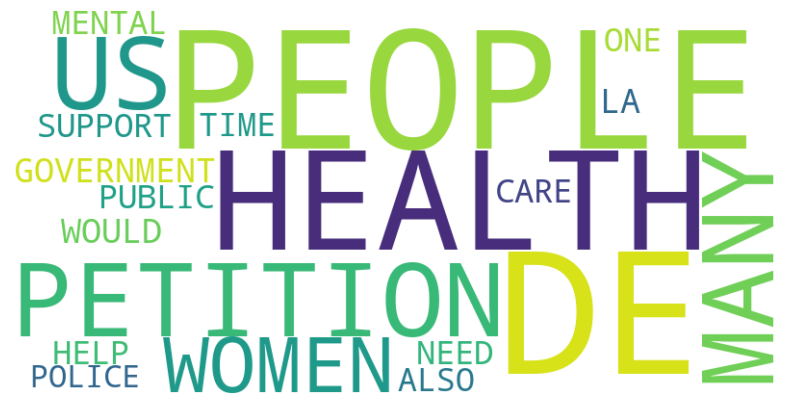

In [19]:

# Crear una wordcloud con las palabras más repetidas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Mostrar la wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
